# Simulating a point mass door attached to spring damper system
In this notebook we attempt to simulate the following equation numerically:
$$m\ddot{x} + \gamma \dot{x} + kx = -F_{ext}$$

For now we consider the external force to be 0 (Solving the homogeneos form). A source term can be easily added.

In [2]:
using DifferentialEquations
using LinearAlgebra
using Plots

Tsit5(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false),)

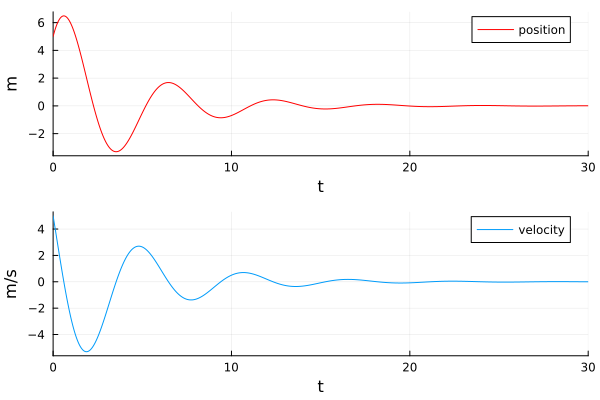

In [13]:
k = 60
c = 23
m = 50
tspan = (0.0,30.0)      

function spring_damper1D!(ddu, du, u, p, t)                                        
    ddu[1] = -1/m * (k*u[1] + c*du[1])                                                               
end                                                                              
                                                                            
function init_equation(v0=0.0, x0=3.0)                                                               
    du0 = [v0]                                                                  
    u0 = [x0]                                                                   
    prob = SecondOrderODEProblem(spring_damper1D!,du0,u0,tspan)                    
    sol = solve(prob)   
    print(sol.alg) 
    sol                                                         
end

sol = init_equation(5.0, 5.0)

p1 = plot(sol, vars=2, label="position", ylabel="m", color=:red)
p2 = plot(sol, vars=1, label="velocity", ylabel="m/s")


plot(p1, p2, layout=(2, 1))

### Simulating 2 point masses connected by springs

We aim to solve the equations:

$$m_1u_1'' = -(k_1+k_2)u_1 + k_2u_2$$
$$m_2u_2'' =  k_2u_1 - (k_2+k_3)u_2$$

Tsit5(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false),)

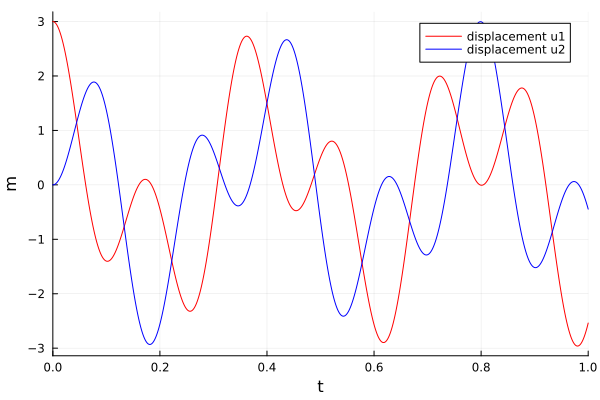

In [12]:
M = [40, 40]
K = [10000, 20000, 10000]
U0 = [3, 0]
tspan = (0, 1)

function two_degree_eq!(ddu, du, u, p, t)
    ddu[1] = -(K[1]+K[2])*u[1] / M[1] + K[2]*u[2] / M[1]
    ddu[2] = K[2]*u[1]/M[2] - (K[2] + K[3])*u[2] / M[2] 
end

function solve_eq(U0, tspan)
    prob = SecondOrderODEProblem(two_degree_eq!,[0,0], U0, tspan)                    
    sol = solve(prob)
    print(sol.alg) 
    sol
end

sol = solve_eq(U0, tspan)
plot(sol, vars=[3], label="displacement u1", xlabel="t", ylabel="m", color=:red)
plot!(sol, vars=[4], label="displacement u2", xlabel="t", ylabel="m", color=:blue)

### Point mass with collisions

### Model the door as a beam

┌ Warning: dt(4.440892098500626e-16) <= dtmin(4.440892098500626e-16) at t=1.426474908794974, and step error estimate = 504.24805476773867. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/tandrei/.julia/packages/SciMLBase/rpVRW/src/integrator_interface.jl:599


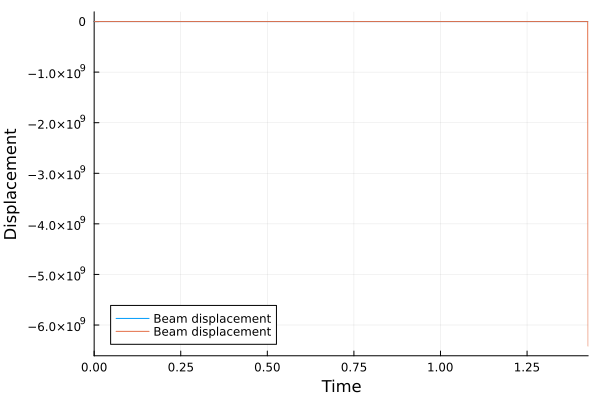

In [1]:
using DifferentialEquations
using Plots

function euler_bernoulli!(du, u, p, t)
    E, I, ρ, A, q = p
    du[1] = u[2]
    du[2] = -(E*I/u[1]^3) * (q(t) - ρ*A*u[2])
end

L = 1.0
q(t) = sin(2π*t)  # Example time-dependent load

u₀ = [L, 0.0]
p = (1.0, 1.0, 1.0, 1.0, q)

tspan = (0.0, 2.0)
prob = ODEProblem(euler_bernoulli!, u₀, tspan, p)
sol = solve(prob, Tsit5())  # You can choose a different solver depending on your needs
plot(sol, xlabel="Time", ylabel="Displacement", label="Beam displacement")
